<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [5]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WPI           0
dtype: int64

In [6]:
import numpy as np

pho = df['Phosphate']

for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [7]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [8]:
df.tail()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
482,7.6,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480,0.015,0.419630
483,7.3,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068,0.033,0.432996
484,5.1,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910,0.163,0.326811
485,7.4,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500,0.219,0.509970
486,7.6,6.9,243.0,68.0,410.8,17.41,82.0,50.0,9.92,1.310,34.89,6.385000,59.940,0.070,0.422551


In [9]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [10]:
normalized_df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190,0.097276
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439,0.075203
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252,0.053492
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703,0.077124
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666,0.041510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.720461,0.150538,0.666667,0.000000,0.673267,0.302210,0.590909,0.268293,0.405251,0.736754,0.276835,0.138785,1.000000,0.008499,0.210614
483,0.634006,0.150538,0.833333,0.543210,0.831683,0.397964,0.621212,0.365854,0.535959,0.496834,0.389353,0.727893,0.581321,0.018697,0.219520
484,0.000000,0.172043,0.928571,0.024691,0.962871,0.761698,0.348485,0.512195,0.816210,0.033322,0.810504,0.952541,0.859482,0.092351,0.148769
485,0.662824,0.236559,0.690476,0.395062,0.710396,0.387132,0.424242,0.487805,0.562215,0.433522,0.418993,0.731644,0.460111,0.124079,0.270807


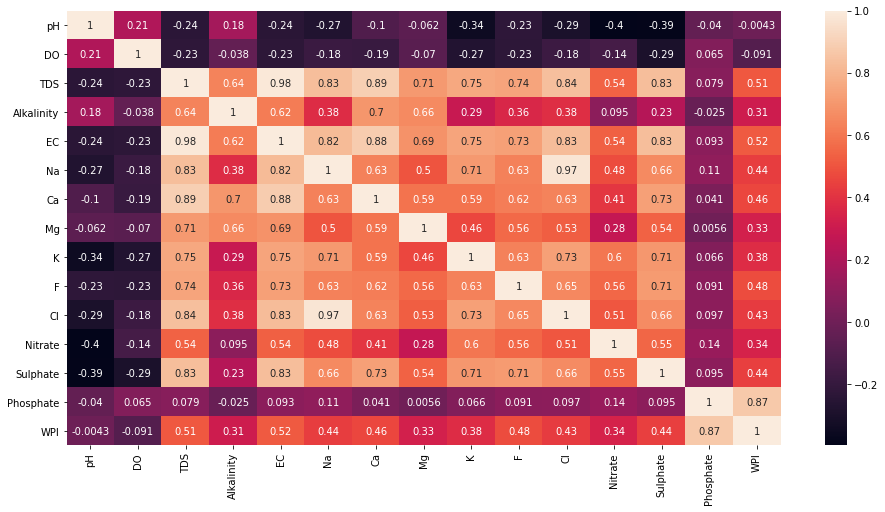

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 8))
sns.heatmap(normalized_df.corr(), annot = True)
plt.show()

In [12]:
normalized_df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [13]:
x = normalized_df.drop('WPI',axis=1)
x.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666


In [14]:
y = normalized_df['WPI']
y.head()

0    0.097276
1    0.075203
2    0.053492
3    0.077124
4    0.041510
Name: WPI, dtype: float64

MLR
Multiple linear regression is a form of linear regression used when there is more than one
predicting variable at play

In [15]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [17]:
y_prediction =  LR.predict(x_test)
y_prediction

array([0.26780792, 0.10976828, 0.097216  , 0.18148955, 0.13327922,
       0.25094018, 0.4424282 , 0.15035981, 0.24367763, 0.12759524,
       0.08954772, 0.20220242, 0.1055206 , 0.11150058, 0.04534676,
       0.07379373, 0.28315527, 0.06633109, 0.19918869, 0.13679542,
       0.10064563, 0.08003358, 0.08031436, 0.1382367 , 0.0414555 ,
       0.08947685, 0.22996734, 0.5372088 , 0.17773195, 0.13540975,
       0.50749867, 0.25499224, 0.15981046, 0.12815714, 0.06986991,
       0.097216  , 0.11566194, 0.2106503 , 0.15295992, 0.40402423,
       0.1070818 , 0.11159724, 0.10693068, 0.24865721, 0.05515217,
       0.09975501, 0.15020451, 0.08338196, 0.10976828, 0.13485258,
       0.06900137, 0.07628456, 0.15843218, 0.13509191, 0.22203892,
       0.09238164, 0.08925567, 0.05648512, 0.07455134, 0.60743287,
       0.09834674, 0.23044669, 0.15473083, 0.05580411, 0.11957517,
       0.07759675, 0.07537406, 0.31211143, 0.26073317, 0.20373699,
       0.09832702, 0.12179393, 0.09689875, 0.1290178 , 0.04737

In [18]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.9999915829896358
mean_sqrd_error is== 9.795137007625016e-08
root_mean_squared error of is== 0.00031297183591539056


In [19]:
print('The shape of our features is:', normalized_df.shape)

The shape of our features is: (487, 15)


In [20]:
# Descriptive statistics for each column
normalized_df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,0.780771,0.348555,0.237112,0.334728,0.243902,0.145497,0.224877,0.272700,0.144762,0.150881,0.149282,0.132028,0.135017,0.050659,0.126569
std,0.118506,0.119050,0.187635,0.123879,0.200713,0.123909,0.135200,0.131895,0.131518,0.164653,0.133517,0.189301,0.141233,0.088617,0.088208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.708934,0.268817,0.111111,0.259259,0.103960,0.067266,0.136364,0.170732,0.070491,0.063312,0.069433,0.024711,0.045135,0.013241,0.078657
50%,0.795389,0.344086,0.182540,0.296296,0.180693,0.106369,0.196970,0.243902,0.109018,0.084305,0.105036,0.053847,0.083501,0.026205,0.100333
75%,0.864553,0.419355,0.289683,0.395062,0.300743,0.174285,0.287879,0.317073,0.165525,0.136288,0.180872,0.154735,0.166249,0.051558,0.139335
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Random Forest
Random forest is a model that uses multiple base models on subsets of the given data and makes
decisions based on all the models. In random forest, the base model is a decision tree, carrying all the
pros of a decision tree with the additional efficiency of using multiple models

In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [22]:
print('Training X Shape:', train_x.shape)
print('Training Y Shape:', train_y.shape)
print('Testing X Shape:', test_x.shape)
print('Testing Y Shape:', test_y.shape)

Training X Shape: (365, 14)
Training Y Shape: (365,)
Testing X Shape: (122, 14)
Testing Y Shape: (122,)


In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y);

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [25]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.9 %.


In [26]:
# Labels are the values we want to predict
labels = np.array(normalized_df['WPI'])
# Remove the labels from the features
# axis 1 refers to the columns
features= normalized_df.drop('WPI', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [27]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [28]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_x, train_y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [29]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Phosphate            Importance: 0.67
Variable: TDS                  Importance: 0.11
Variable: F                    Importance: 0.06
Variable: EC                   Importance: 0.05
Variable: DO                   Importance: 0.03
Variable: Ca                   Importance: 0.02
Variable: pH                   Importance: 0.01
Variable: Na                   Importance: 0.01
Variable: K                    Importance: 0.01
Variable: Cl                   Importance: 0.01
Variable: Nitrate              Importance: 0.01
Variable: Sulphate             Importance: 0.01
Variable: Alkalinity           Importance: 0.0
Variable: Mg                   Importance: 0.0


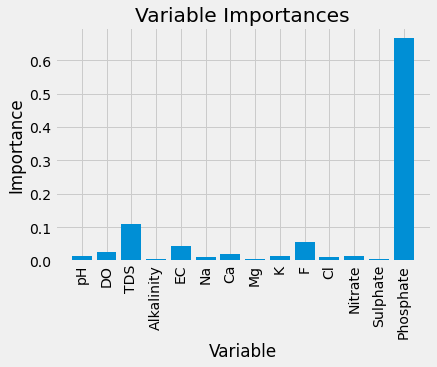

In [30]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


gradient boosting algorithm-This is the most contemporary algorithm used in most competitions. It uses an additive model
that allows for optimization of differentiable loss function. 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [33]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [34]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(x_test)]
best_n_estimators = np.argmin(errors)

In [35]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=2)

In [36]:
y_pred = best_regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.026092267293081083

**Ridge Regression**
Ridge regression works on the same principles as linear regression, it just adds a certain bias to
negate the effect of large variances and to void the requirement of unbiased estimators. It penalizes the
coefficients that are far from zero and minimizes the sum of squared residuals

In [49]:
%matplotlib inline

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [50]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [51]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 14)

Text(0, 0.5, 'weights')

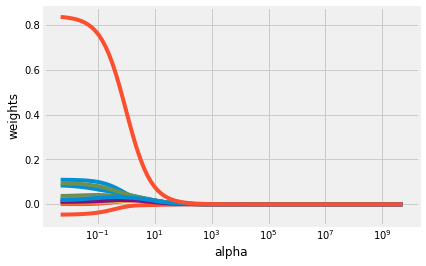

In [52]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [53]:
# Split data into training and test sets
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [54]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(x_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

pH            0.020044
DO            0.004127
TDS           0.020409
Alkalinity    0.016237
EC            0.019295
Na            0.029886
Ca            0.030167
Mg            0.012318
K             0.018481
F             0.031378
Cl            0.026106
Nitrate       0.016791
Sulphate      0.022889
Phosphate     0.169060
dtype: float64
0.0028969642519333294


In [55]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(x_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

pH            1.611172e-12
DO           -4.610804e-13
TDS           2.485485e-11
Alkalinity    1.991443e-11
EC            2.298095e-11
Na            3.607121e-11
Ca            3.312693e-11
Mg            2.045203e-11
K             2.648586e-11
F             2.905440e-11
Cl            3.274911e-11
Nitrate       1.884097e-11
Sulphate      2.812232e-11
Phosphate     8.873547e-11
dtype: float64
0.006140676742544274


In [56]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(x_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

pH            1.100968e-01
DO           -4.610503e-02
TDS           2.398651e-02
Alkalinity    3.854976e-02
EC            2.403411e-02
Na            1.098430e-02
Ca            8.376243e-02
Mg           -4.043862e-16
K             8.338169e-03
F             9.521631e-02
Cl            1.323066e-02
Nitrate       1.027252e-02
Sulphate      1.973900e-02
Phosphate     8.400039e-01
dtype: float64
4.0864277169150655e-06


In [57]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.005

In [58]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(x_train, y_train)
mean_squared_error(y_test, ridge4.predict(x_test))

4.2837753424207646e-06

In [60]:
ridge4.fit(x, y)
pd.Series(ridge4.coef_, index = x.columns)

pH            0.109291
DO           -0.046243
TDS           0.026055
Alkalinity    0.037005
EC            0.024074
Na            0.012509
Ca            0.083817
Mg            0.001150
K             0.008612
F             0.093613
Cl            0.010671
Nitrate       0.010738
Sulphate      0.018867
Phosphate     0.835987
dtype: float64

**Lasso Regression**
Lasso regression works on the same principles as ridge regression, the only difference is how they
penalize their coefficients that are off. Lasso penalizes the sum of absolute errors instead of the sum of
squared coefficients

Text(0, 0.5, 'weights')

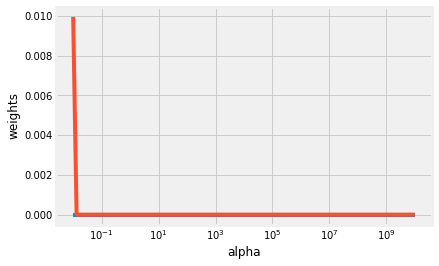

In [61]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [62]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mean_squared_error(y_test, lasso.predict(x_test))

4.148196504301469e-06

In [63]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=x.columns)


pH            0.108499
DO           -0.045287
TDS           0.029189
Alkalinity    0.036061
EC            0.022907
Na            0.009431
Ca            0.083777
Mg            0.000000
K             0.008013
F             0.095434
Cl            0.012346
Nitrate       0.009518
Sulphate      0.017014
Phosphate     0.839281
dtype: float64

**Elastic net regression** combines the best of both ridge and lasso regression. It combines the method
of penalties of both methods and minimizes the loss function

In [64]:
# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 0.006140676746608994


,Columns,Coefficient Estimate
0,pH,0.0
1,DO,-0.0
2,TDS,0.0
3,Alkalinity,0.0
4,EC,0.0
5,Na,0.0
6,Ca,0.0
7,Mg,0.0
8,K,0.0
9,F,0.0
